In [1]:
import skimage
import skimage.io
import skimage.transform
import pathlib
import numpy as np
import utils
import matplotlib.pyplot as plt
image_dir = pathlib.Path("images")
impaths = [
    image_dir.joinpath("page1.png"),
    image_dir.joinpath("page2.png"),
    image_dir.joinpath("page4.png"),
    image_dir.joinpath("page6.png"),
    image_dir.joinpath("page7.png"),
    image_dir.joinpath("page8.png"),
]

In [103]:
def threshold(im, binary_im, threshold):
    rows = len(im)
    try:
        cols = len(im[0])
    except:
        cols = 1
    
    for i in range(rows):
        for j in range(cols):
            if im[i][j] < threshold:
                binary_im[i][j] = 0
            else:
                binary_im[i][j] = 1
    return binary_im

def create_binary_image(im):
    """Creates a binary image from a greyscale image "im"

    Args:
        im ([np.ndarray, np.float]): [An image of shape [H, W] in the range [0, 1]]

    Returns:
        [np.ndarray, np.bool]: [A binary image]
    """

    # START YOUR CODE HERE ### (You can change anything inside this block)
    binary_im = np.zeros_like(im, dtype=np.bool)

    im_fft = np.fft.fftshift(np.fft.fft2(im))
    plt.figure(figsize=(4, 12)) 
    plt.subplot(1,2,1)
    plt.imshow(np.log1p(abs(im_fft)), cmap="gray")

    temp = np.array(np.log1p(abs(im_fft))).flatten()
    temp = np.sort(temp, axis=None)
    threshold_value = temp[-200]

    im_fft = np.log1p(abs(im_fft))
    binary_im = threshold(im_fft,binary_im,threshold_value)

    plt.subplot(1,2,2)
    plt.imshow(binary_im, cmap="gray")


    ### END YOUR CODE HERE ###
    return binary_im

/tmp/ipykernel_9716/1522006822.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_im = np.zeros_like(im, dtype=np.bool)
/tmp/ipykernel_9716/1340993375.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert im_binary.dtype == np.bool,            f"Expected the image to be of dtype np.bool, got {im_binary.dtype}"


Found angle: -21.81
Found angle: 90.00
Found angle: 25.82
Found angle: -26.32
Found angle: -67.44
Found angle: 90.00
Saving image to: image_processed/task4d.png


<Figure size 400x1200 with 0 Axes>

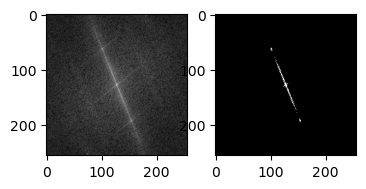

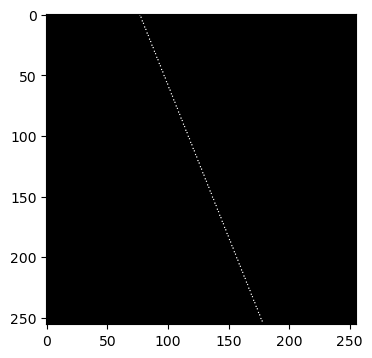

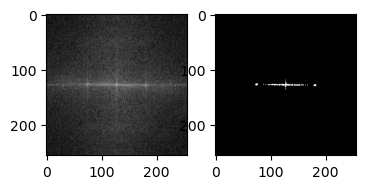

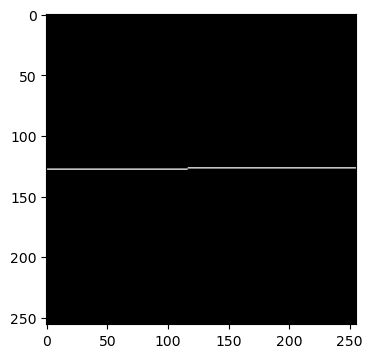

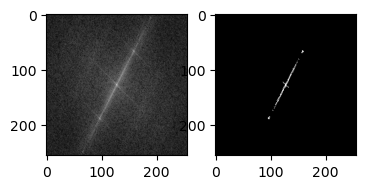

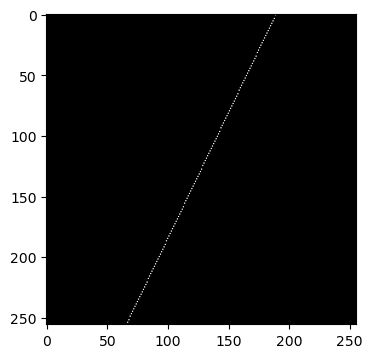

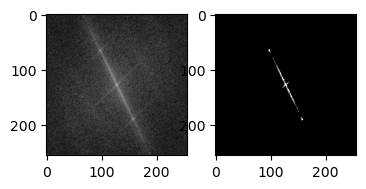

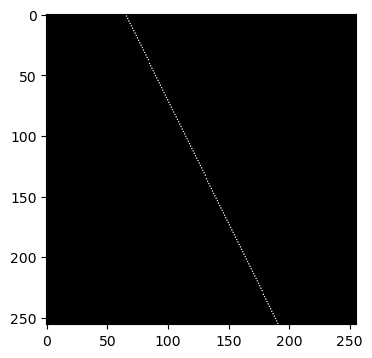

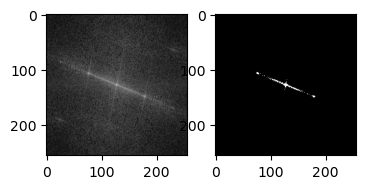

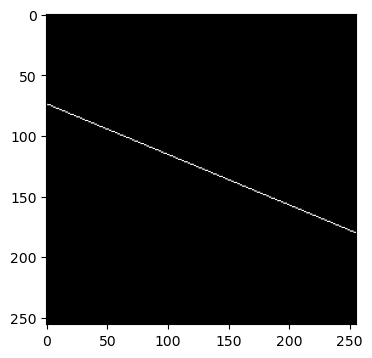

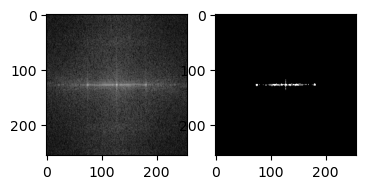

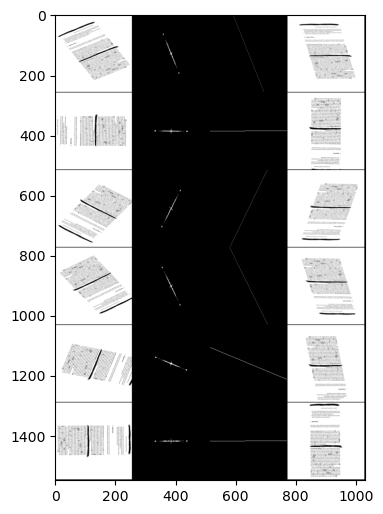

In [104]:
if __name__ == "__main__":
    # NO NEED TO EDIT THE CODE BELOW.
    verbose = True
    plt.figure(figsize=(4, 12))    
    plt.tight_layout()
    images_to_visualize = []
    for i, impath in enumerate(impaths):
        im = utils.read_im(str(impath))
        im_binary = create_binary_image(im)
        assert im_binary.dtype == np.bool,            f"Expected the image to be of dtype np.bool, got {im_binary.dtype}"
        angles, distances = utils.find_angle(im_binary)
        angle = 0
        if len(angles) > 0:
            angle = angles[0] * 180 / np.pi
        print(f"Found angle: {angle:.2f}")
        hough_im = utils.create_hough_line_image(im, angles, distances)
        rotated = skimage.transform.rotate(im, angle, cval=im.max())
        images_to_visualize.extend(
            [im, im_binary, hough_im, rotated]
        )
        plt.figure(figsize=(4, 12))  
        plt.imshow(hough_im, cmap="gray")
    image = utils.np_make_image_grid(images_to_visualize, nrow=len(impaths))
    utils.save_im("task4d.png", image)
    plt.imshow(image, cmap="gray")